# TP2 SI221

## Exercice 1 : k-NN classification:  Synthetic dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import  train_test_split

In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


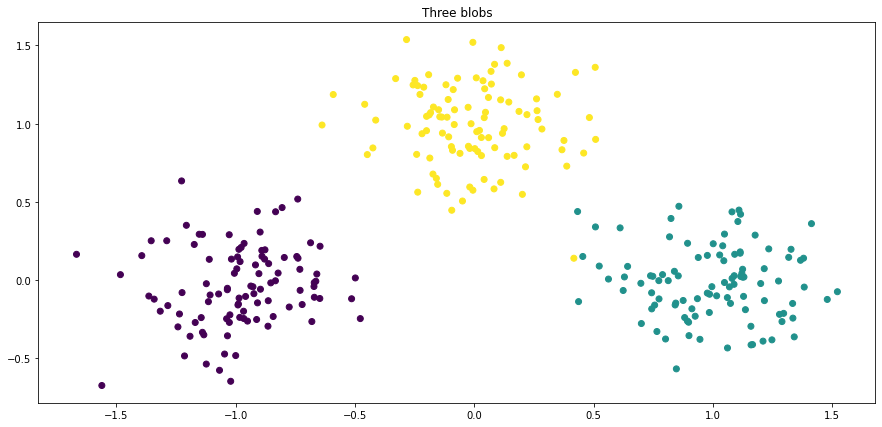

In [2]:
plt.figure(figsize=(15,7))
X, y = make_blobs(n_samples=300, centers=[[-1,0],[1,0],[0,1]], n_features=2,cluster_std=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Three blobs")
plt.show()

In [3]:
# function that calculate the Euclidean distance between two vectors

def euclidean_distance(v1, v2):
    d = 0.0
    for i in range(len(v1)):
        d += (v1[i] - v2[i])**2
    return np.sqrt(d)

In [4]:
#function that enables to sort the neigbors by distance
def tri_insertion(t):
    for k in range(1,len(t)):
        temp=[t[k][0],t[k][1]]
        j=k
        while j>0 and temp[1]<t[j-1][1]:
            t[j]=t[j-1]
            j-=1
        t[j]=temp

# Locate the most similar neighbors
def get_neighbors(X_train, new_x , K):
    distances=[]
    for i in range(len(X_train)):
        d = euclidean_distance(X_train[i], new_x)
        distances.append([i,d])
    tri_insertion(distances)
    neighbors=[]
    for i in range(K):
        neighbors.append(distances[i][0])
    return neighbors

#returns the predicted label of x
def predicted_label(X_train,y_train,x,K,nb_labels):
    labels=[0]*nb_labels
    neighbors=get_neighbors(X_train, x , K)
    for neighbor in neighbors:
        labels[y_train[neighbor]]+=1
    return (labels.index(max(labels)))

### Question 1

Comment on what happens with the decision boundary when K increases.

In [7]:
#plot the decision boundaries
def maping(X_train,y_train,K):
    n=len(X_train)
    nb_mesures=10
    minX=X_train[0][0]-0.5
    minY=X_train[0][1]-0.5
    maxX=X_train[0][0]+0.5
    maxY=X_train[0][1]+0.5
    plt.figure(figsize=(15,7))
    for i in range(n):
        if y_train[i]==0:
            plt.plot(X_train[i][0],X_train[i][1],marker='o',color='b')
        if y_train[i]==1:
            plt.plot(X_train[i][0],X_train[i][1],marker='o',color='g')
        if y_train[i]==2:
            plt.plot(X_train[i][0],X_train[i][1],marker='o',color='y')         
        if X_train[i][0]<minX:
            minX=X_train[i][0]-0.5
        if X_train[i][0]>maxX:
            maxX=X_train[i][0]+0.5
        if X_train[i][1]<minY:
            minY=X_train[i][1]-0.5
        if X_train[i][1]>maxY:
            maxY=X_train[i][1]+0.5      
    X=np.linspace(minX,maxX,nb_mesures)
    Y=np.linspace(minY,maxY,nb_mesures)
    xx1, xx2 = np.meshgrid(X,Y)
    z=[]
    inputs = np.c_[xx1.ravel(), xx2.ravel()]
    for i in range(len(inputs)):
        z.append(predicted_label(X_train,y_train,inputs[i],K,3))
    result = np.array(z).reshape(xx1.shape)
    plt.contourf(xx1,xx2,result)
    plt.title("Knn with "+str(K)+" neighbors")
    plt.show()

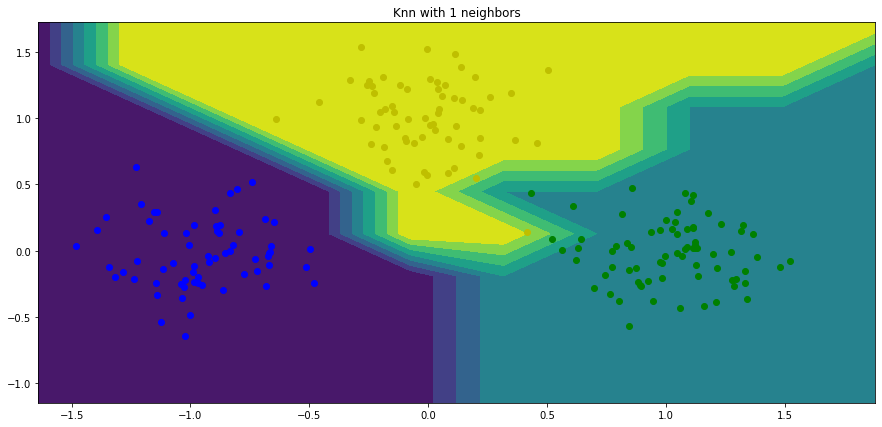

In [8]:
maping(X_train,y_train,1)

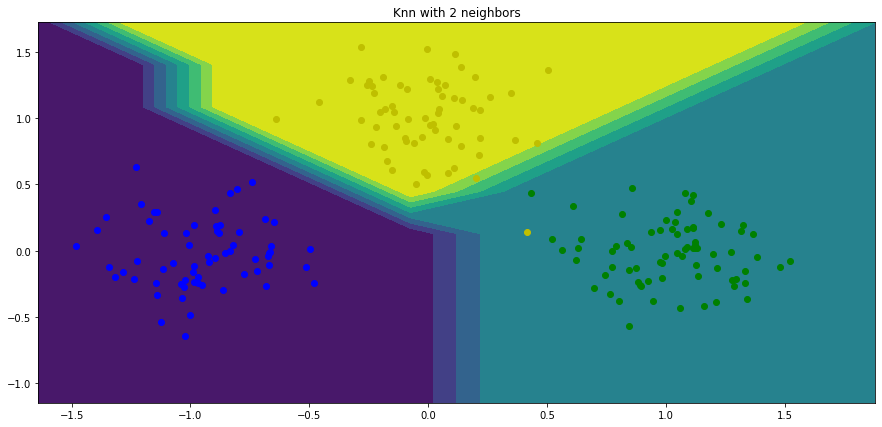

In [9]:
maping(X_train,y_train,2)

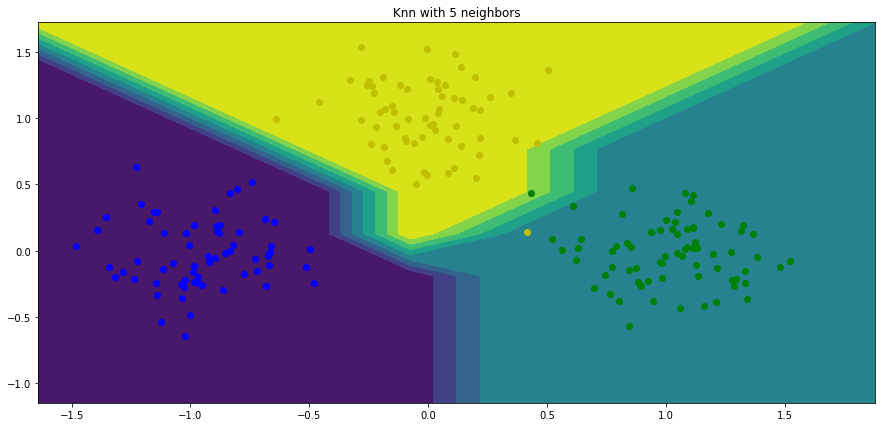

In [10]:
maping(X_train,y_train,5)

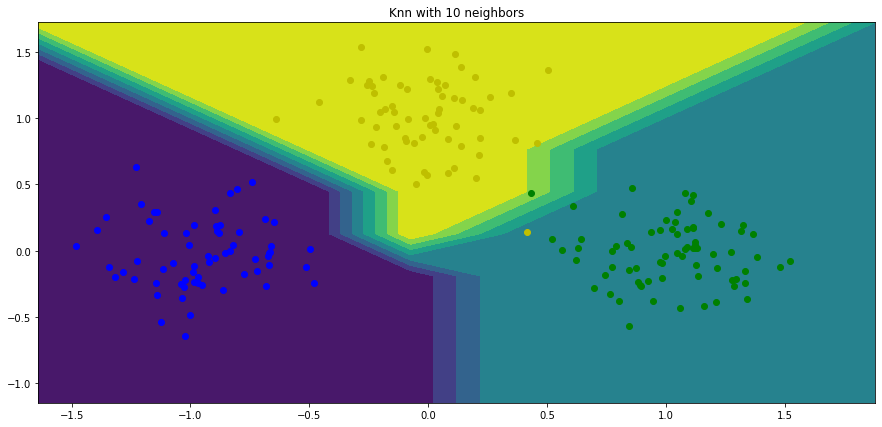

In [11]:
maping(X_train,y_train,10)

---

***Response :*** When K increases, we take into account more neighbors, and that make the boundaries more linear.
Because we realize a kind of "mean" over several points. The result does not only depend on one point, which could be "noise".

---

### Question 2

We interest ourselves to the error when K and the standard deviation of our data varies

In [12]:
#returns the average error of y_test
def error(X_train,X_test,y_train,y_test,K,nb_labels):
    error=0
    for i in range(len(X_test)):
        a=predicted_label(X_train,y_train,X_test[i],K,nb_labels)
        #print("True labels = ", y_test[i]," //// Prediction = ", a) 
        if a!=y_test[i]:   
            error+=1
    return float(error)/len(X_test)

In [13]:
def error_Knn(K,std,n_iter=50):
    average_error=[]
    for iter in range(n_iter):
        X, y = make_blobs(n_samples=300, centers=[[-1,0],[1,0],[0,1]], n_features=2,cluster_std=std)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        average_error.append(error(X_train,X_test,y_train,y_test,K,3))
    average_error=np.array(average_error)
    return average_error.mean(),average_error.std()

#### Different stds for K=5

We test different standard deviation for our data, for K=5.
(We took different stds than yours because the error was almost always 0 and so the results were not significant) 

In [14]:
stds=[0.2,0.3,0.4,0.5]
K=5

means=[]
std_deviations=[]

for std in stds:
    means.append(error_Knn(K,std)[0])
    std_deviations.append(error_Knn(K,std)[1])

No handles with labels found to put in legend.


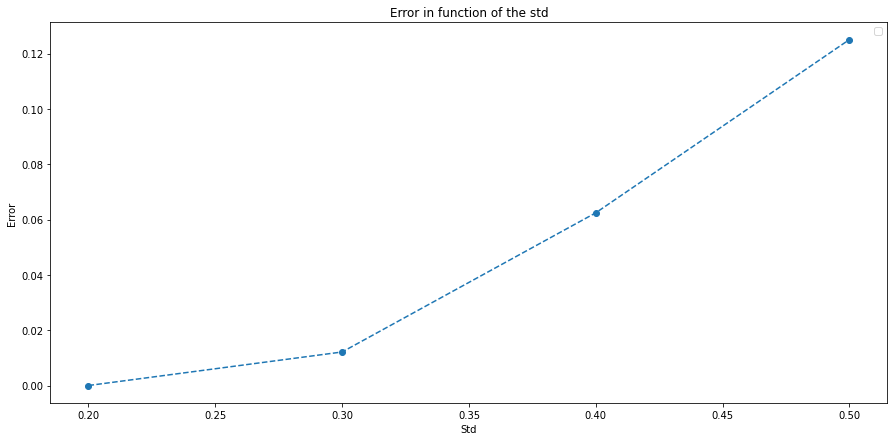

In [15]:
plt.figure(figsize=(15,7))
plt.plot(stds,means,marker="o",linestyle='--')
plt.title("Error in function of the std")
plt.xlabel("Std")
plt.ylabel("Error")
plt.legend()
plt.show()

No handles with labels found to put in legend.


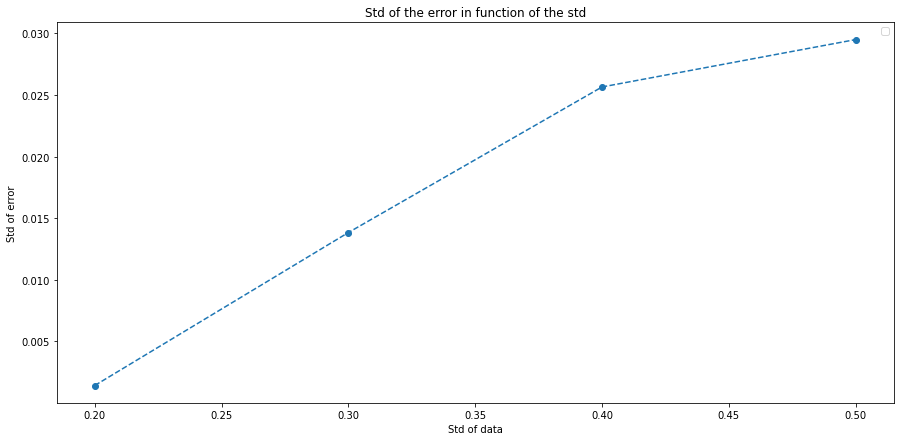

In [16]:
plt.figure(figsize=(15,7))
plt.plot(stds,std_deviations,marker="o",linestyle='--')
plt.title("Std of the error in function of the std")
plt.xlabel("Std of data")
plt.ylabel("Std of error")
plt.legend()
plt.show()

---

***Response :*** When the std increases, the points are less separable so the error increases also. The std of the error also increases becauses the cases are more diverse.

---

#### Different K for std = 0.4

In [73]:
std=0.4
Ks=[1,2,10]

means=[]
std_deviations=[]

for K in Ks:
    means.append(error_Knn(K,std)[0])
    std_deviations.append(error_Knn(K,std)[1])

No handles with labels found to put in legend.


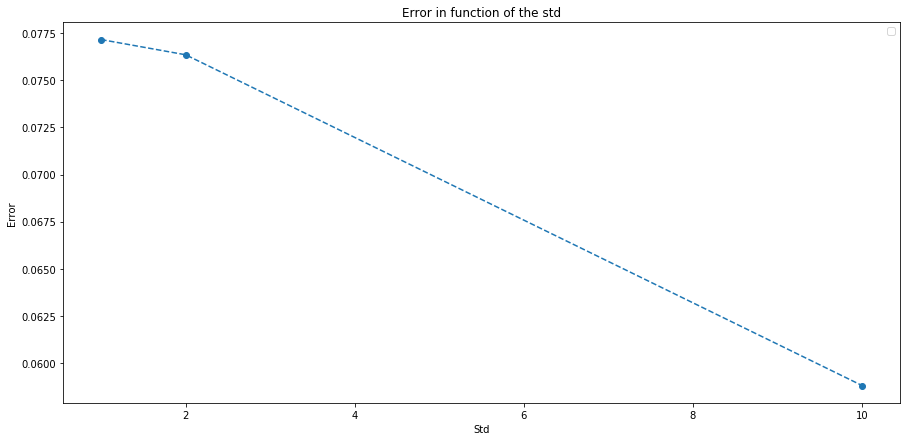

In [74]:
plt.figure(figsize=(15,7))
plt.plot(Ks,means,marker="o",linestyle='--')
plt.title("Error in function of K")
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()
plt.show()

No handles with labels found to put in legend.


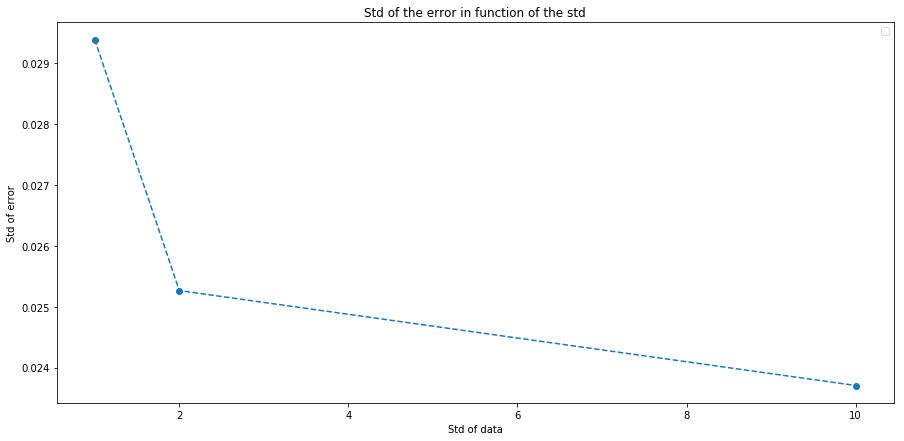

In [75]:
plt.figure(figsize=(15,7))
plt.plot(Ks,std_deviations,marker="o",linestyle='--')
plt.title("Std of the error in function of K")
plt.xlabel("K")
plt.ylabel("Std of error")
plt.legend()
plt.show()

---- 

***Response :*** When K increases, the error reduces. But when K is too high, the error increases again. We have to practice the cross validation in order to find the best K.

----

## Exercice 2 :  k-NN regression:  Szeged-weather dataset

### Question 1 : Visualization

In [17]:
import pandas as pd
import numpy as np

df=pd.read_csv('weatherHistory.csv', index_col=0)

In [18]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [40]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [41]:
X=np.array(df["Temperature (C)"])

In [42]:
Y=np.array(df["Humidity"])

In [43]:
Color=np.array(df["Apparent Temperature (C)"])

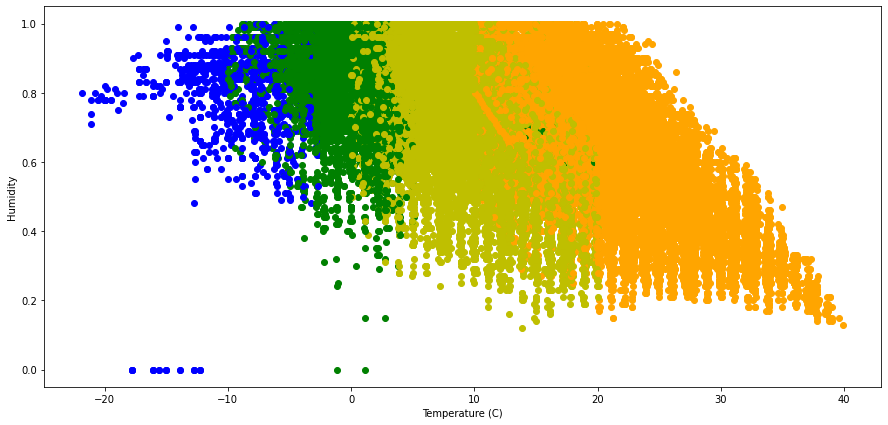

In [26]:
n=len(X)
plt.figure(figsize=(15,7))
for i in range(n):
    x,y=X[i],Y[i]
    color=Color[i]
    if color<-10:
        c='b'
    if color>-10 and color <0:
        c='g'
    elif color>0 and color <10:
        c='y'
    elif color>10 and color>20:
        c='orange'
    elif color>20 and color<30:
        c='r'
    plt.plot([x],[y],color=c,marker='o')
    
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.show()



---
***Response***: We see that the apparent temperature is less important when there is a humidity superior than 0.6.

---

### Question 2 : Error in the regression

In [44]:
n=2000
new_X=[]
y=np.array(df["Apparent Temperature (C)"])

for i in range(n):
    new_X.append([X[i],Y[i]])
    
y=y[:2000]

In [45]:
#We shuffle the data and then we divide it into 5 folds

from sklearn.utils import shuffle
new_X,y=shuffle(new_X,y)

X0=new_X[:n//5]
X1=new_X[n//5:2*n//5]
X2=new_X[2*n//5:3*n//5]
X3=new_X[3*n//5:4*n//5]
X4=new_X[4*n//5:n]
y0=y[:n//5]
y1=y[n//5:2*n//5]
y2=y[2*n//5:3*n//5]
y3=y[3*n//5:4*n//5]
y4=y[4*n//5:n]

X=[X0,X1,X2,X3,X4]
y=[y0,y1,y2,y3,y4]

In [46]:
#returns the predicted label of x by doing an average of the neighbors' labels
def predicted_label_regression(X_train,y_train,x,K):
    labels=0
    neighbors=get_neighbors(X_train, x , K)
    for neighbor in neighbors:
        labels+=y_train[neighbor]
    return labels/len(neighbors)

In [47]:
#returns the average error of y_test
def error_r(X_train,X_test,y_train,y_test,K):
    error=0
    for i in range(len(X_test)):
        error+= abs(predicted_label_regression(X_train,y_train,X_test[i],K)-y_test[i])
    return error/len(X_test)

In [48]:
def error_regression(K):
    errors=[]
    #Creation of X_train,X_test,y_train and y_test by choosing the different folds
    for i in range(5):    
        X_test=X[i]
        y_test=X[i]
        X_train=[]
        y_train=[]
        len_train=0
        for k in range(5):
            if k!=i:
                X_train.append(X[k])
                y_train.append(y[k])
                len_train+=len(X[k])
        X_train=np.array(X_train)
        y_train=np.array(y_train)
        X_train=np.concatenate((X_train[0],X_train[1],X_train[2],X_train[3]),axis=0)
        y_train=np.concatenate((y_train[0],y_train[1],y_train[2],y_train[3]),axis=0)
        #error with X_test=X[i]
        errors.append(error_r(X_train,X_test,y_train,y_test,K))
    erros=np.array(errors)
    return erros.mean(),erros.std()


In [50]:
Ks=[2,3,4,5,6,7,8,9,10]
means=[]
stds=[]

for K in Ks:
    res=error_regression(K)
    means.append(res[0])
    stds.append(res[1])

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(Ks,means,marker="o",linestyle='--')
plt.title("Error in function of K")
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(Ks,stds,marker="o",linestyle='--')
plt.title("Std of the error in function of K")
plt.xlabel("K")
plt.ylabel("Std of the error")
plt.legend()
plt.show()

## Part 3 :  k-NN classification:  MNIST dataset

In [56]:
import scipy.io
train = scipy.io.loadmat("data_app.mat")
test = scipy.io.loadmat("data_test.mat")

### Question 1 : Visualization

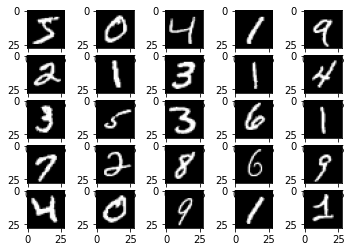

In [57]:
#Visualization of the dataset (25 data over 1000)

fig, axs = plt.subplots(5, 5)
for i in range(25):
    im=train['x'][i]
    im=im.reshape((28,28))
    axs[i//5, i%5].imshow(im,cmap='gray')

(array([116.,  99.,  93., 105.,  92.,  94., 117.,  87., 100.,  97.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

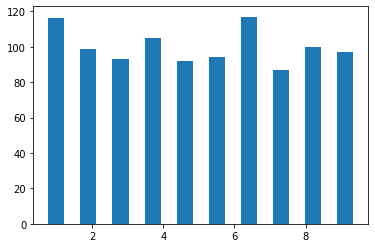

In [58]:
#Vizualization of the labels y_train (histogram)

labels=train['S']
labels=labels.reshape(len(labels))
plt.hist(labels,rwidth=0.5,align='left')

(array([38., 28., 28., 38., 24., 25., 34., 31., 32., 22.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

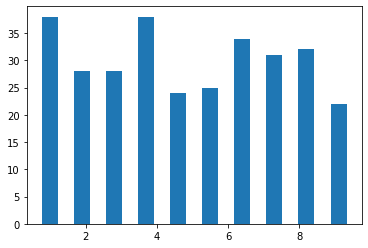

In [59]:
#Vizualization of the labels y_test (histogram)

labels=test['S']
labels=labels.reshape(len(labels))
plt.hist(labels,rwidth=0.5,align='left')

***Response :*** The most represented labels are 1 and 7. 
Data are distributed almost with a uniform law over (0,10).

### Question 2 : error of knn with different K 

In [64]:
X_train=train['x']
y_train=train['S']
y_train=y_train.reshape(len(y_train))
y_train[y_train==10]=0
X_test=test['x']
y_test=test['S']
y_test=y_test.reshape(len(y_test))
y_test[y_test==10]=0

In [66]:
print(X_train.shape)
print(X_test.shape)

(1000, 784)
(300, 784)


In [35]:
error(X_train,X_test,y_train,y_test,K=1,nb_labels=10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


True labels =  0  //// Prediction =  6
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  9  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  3  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  8  //// Prediction =  5
True labels =  7  //// Prediction =  1
True labels =  0  //// Prediction =  1
True labels =  8  //// Prediction =  4
True labels =  1  //// Prediction =  1
True labels =  0  //// Prediction =  4
True labels =  7  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  7  //// Prediction =  7
True labels =  7  //// Prediction =  7
True labels =  5  //// Prediction =  1
True labels =  8  //// Pr

True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  2  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  7  //// Prediction =  7
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  4
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  9  //// Prediction =  1
True labels =  5  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  6  //// Prediction =  6
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  3
True labels =  4  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  4  //// Prediction =  7
True labels =  3  //// Prediction =  1
True labels =  3  //// Prediction =  2
True labels =  9  //// Prediction =  1
True labels =  8  //// Pr

0.69

In [36]:
error(X_train,X_test,y_train,y_test,K=3,nb_labels=10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


True labels =  0  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  9  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  3  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  8  //// Prediction =  5
True labels =  7  //// Prediction =  1
True labels =  0  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  0  //// Prediction =  0
True labels =  7  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  5  //// Prediction =  1
True labels =  8  //// Pr

True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  2  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  7  //// Prediction =  7
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  9  //// Prediction =  1
True labels =  5  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  6  //// Prediction =  6
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  3
True labels =  4  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  4  //// Prediction =  7
True labels =  3  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  9  //// Prediction =  1
True labels =  8  //// Pr

0.7666666666666667

In [37]:
error(X_train,X_test,y_train,y_test,K=5,nb_labels=10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


True labels =  0  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  9  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  8  //// Prediction =  5
True labels =  7  //// Prediction =  1
True labels =  0  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  0  //// Prediction =  0
True labels =  7  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  5  //// Prediction =  1
True labels =  8  //// Pr

True labels =  1  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  2  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  4  //// Prediction =  4
True labels =  9  //// Prediction =  1
True labels =  5  //// Prediction =  1
True labels =  8  //// Prediction =  1
True labels =  6  //// Prediction =  6
True labels =  7  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  4  //// Prediction =  1
True labels =  6  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  1  //// Prediction =  1
True labels =  7  //// Prediction =  1
True labels =  4  //// Prediction =  7
True labels =  3  //// Prediction =  1
True labels =  3  //// Prediction =  1
True labels =  9  //// Prediction =  1
True labels =  8  //// Pr

0.8033333333333333

### Question 3 : Confusion matrix

In [53]:
def confusion_matrix(X_train,X_test,y_train,y_test,K,nb_labels=10):
    res=np.zeros((nb_labels,nb_labels))
    n=len(X_test//4)
    for i in range(n):
        true_label=y_test[i]
        prediction_label=predicted_label(X_train,y_train,X_test[i],K,nb_labels)
        res[true_label][prediction_label]+=1
    return res 


In [54]:
confusion_matrix(X_train,X_test,y_train,y_test,3,10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


array([[ 7., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 26.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1., 26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., 30.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 21.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 0., 22.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.],
       [ 0., 25.,  0.,  0.,  1.,  0.,  0.,  8.,  0.,  0.],
       [ 0., 28.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 0., 23.,  0.,  0.,  4.,  0.,  0.,  2.,  0.,  3.]])